In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import mglearn
from sklearn.model_selection import train_test_split

#from sklearn.linear_mopdel import LinearRegression
#from sklearn.datasets import make_blobs

일반적인 리니어한 방법으로 개체를 분석하는 방법은
라인을 세개긋고, 각라인의 중심점을 찾아 분류하는 방식
 이 방법의 문제= 집합(클래스)의 갯수가 많아질 수록 분류가 어려워짐
    라인을 넘어 각자의 영역을 침범하는 집합이 발생하면 데이터의 정확도가 떨어짐
    
    이 문제를 보완한 알고리즘=
## tree계열 분류 알고리즘    

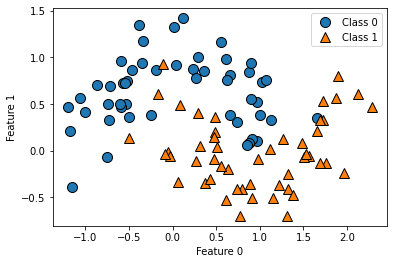

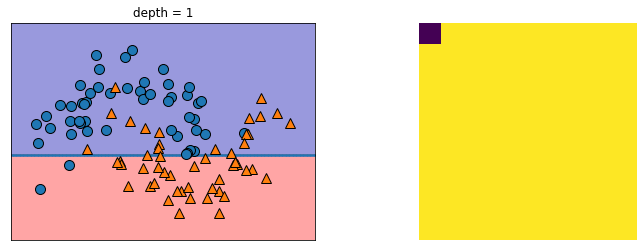

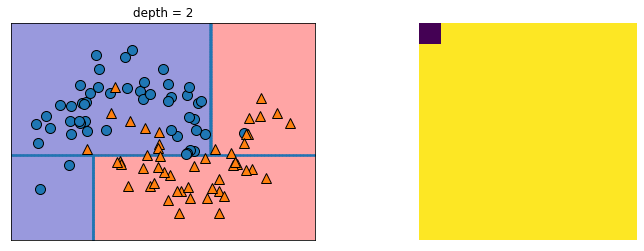

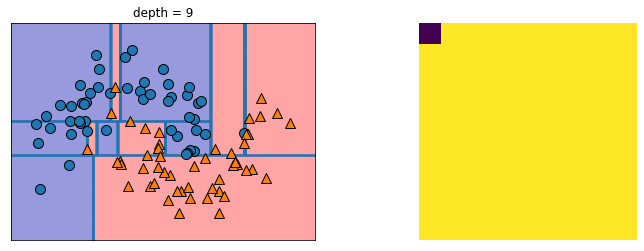

In [2]:
mglearn.plots.plot_tree_progressive()

In [3]:
# 우측 노란박스는 로컬컴퓨터에서 그랯픽설정이 안된경우 뜬 오류(코랩에서실행가능)

# tree계열은 depth개념이 포함. (토너먼트식= 뎁스1->뎁스2->뎁스...)
#뎁스가 깊어질 수록 분류의 정확도는 높아짐 
#but 데이터집착문제 초래=방지위해 hyper parameter로 분류횟수결정해야함

In [4]:
from sklearn.tree import DecisionTreeClassifier


from sklearn.datasets import load_breast_cancer
#트리알고리즘을 활용하기 위해 유방암데이터 불러옴

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0)

#생성한 데이터에 작동할 알고리즘 설정
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9300699300699301


In [6]:
# #결과해석
# 학습 100%, 테스트 93%
# 군집이 모호하고 경계가 불분명한 데이터는 트리 알고리즘으로 정확도 높은 결과를 얻을 수 있음.

In [7]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
#max_depth데이터의 과접합을 막기 위해 설정
tree.fit(X_train,y_train)

print(tree.score(X_train,y_train))
print(tree.score(X_test, y_test))

#예상=뎁스4로 제약을 걸었으므로 학습정확도는 떨어짐.  테스트는 상승하강 모름
#결과=테스트 정확도 소폭상승=결과적으로 데이터의 정확도 높아짐

0.9953051643192489
0.951048951048951


### tree 형 알고리즘 case study

[Text(0.5657894736842105, 0.9, 'mean concave points <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]\nclass = b'),
 Text(0.34210526315789475, 0.7, 'worst radius <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]\nclass = b'),
 Text(0.21052631578947367, 0.5, 'radius error <= 0.626\ngini = 0.039\nsamples = 249\nvalue = [5, 244]\nclass = b'),
 Text(0.10526315789473684, 0.3, 'worst smoothness <= 0.178\ngini = 0.024\nsamples = 246\nvalue = [3, 243]\nclass = b'),
 Text(0.05263157894736842, 0.1, 'gini = 0.016\nsamples = 245\nvalue = [2, 243]\nclass = b'),
 Text(0.15789473684210525, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = a'),
 Text(0.3157894736842105, 0.3, 'symmetry error <= 0.025\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = a'),
 Text(0.2631578947368421, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = a'),
 Text(0.3684210526315789, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = b'),
 Text(0.47368421052631576, 0.5, 'worst texture <= 19.91\ng

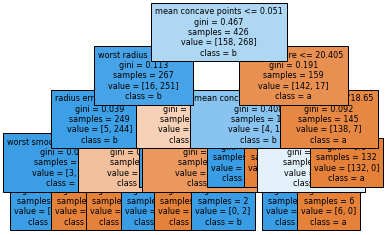

In [8]:
from sklearn.tree import plot_tree

plot_tree(tree,class_names=['a','b'],filled=True, fontsize=8, 
          feature_names=cancer.feature_names) #쉼표 탈자
#feature설정= 각각의 데이터가 분류된 기준이 명확히 보임

In [9]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


In [10]:
# 각 트리의 중요도를 백분율로 표현

Text(0, 0.5, 'price')

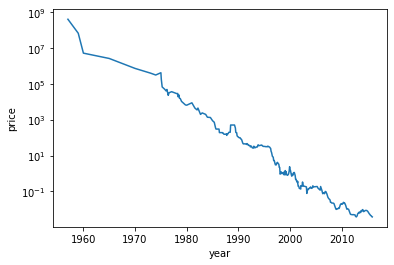

In [11]:
import os
#os패키지=운영체계와 관련된 패키지

ram_price = pd.read_csv('C:/Users/Admin/Documents/AI school/0413 sckit learn/ram_price.csv')

plt.semilogy(ram_price.date,ram_price.price)
#semilogy=간단한 그래프생성 

plt.xlabel('year')
plt.ylabel('price')
#라벨 오류발생. 해결= 커널전체 재실행

In [12]:
#위 그래프 해석= 아래의 데이터테이블의 날짜를 x축, 가격을 y축으로 지정하여 그림
ram_price 

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [13]:
from sklearn.tree import DecisionTreeClassifier

data_train = ram_price[ram_price.date < 2000] #data->date 오타
data_test = ram_price[ram_price.date >= 2000]

In [14]:
data_train

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
197,197,1999.50,7.800000e-01
198,198,1999.67,8.700000e-01
199,199,1999.75,1.040000e+00
200,200,1999.83,1.340000e+00


In [15]:
#위 데이터에서 날짜만 뽑아내면
data_train.date 

0      1957.00
1      1959.00
2      1960.00
3      1965.00
4      1970.00
        ...   
197    1999.50
198    1999.67
199    1999.75
200    1999.83
201    1999.92
Name: date, Length: 202, dtype: float64

In [16]:
type(data_train.date) #타입 확인

pandas.core.series.Series

In [17]:
#판다스의 시리즈객체타입임을 확인 넘파이 타입으로 바꾸려면
type(data_train.date.to_numpy()) #딥러닝의 기본배열은 "넙파이"

numpy.ndarray

In [18]:
#날짜배열로 저장
X_train=data_train.date.to_numpy()[:,np.newaxis]
#:,np.newaxis 넙파이 배열에서 새로운 축(차원)을 하나 늘려주는 명령

In [19]:
# #만들고자하는 데이터 
# x=날짜 y=가격
# 'x일의  y가격은 얼마인가'

In [20]:
#y=가격배열 저장됨
y_train=np.log(data_train.price)
#np.log데이터의 변별력을 주기위해 사용

In [21]:
#데이터비교
from sklearn.linear_model import LinearRegression#리니어알고리즘 활성 #mopdel 오타
from sklearn.tree import DecisionTreeRegressor
#구별할때= Classifier 값을 예측할 때=Regressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [22]:
#에측전에 기간설정 후 진행
X_all=ram_price.date.to_numpy()[:,np.newaxis] #np 오타

In [23]:
#예측한 값을 pred_tree라는 이름으로 저장
pred_tree=tree.predict(X_all)
#리니어리그리서로 위와같은 작업
pred_lr=linear_reg.predict(X_all)

In [24]:
#예측결과= X날짜를 가지고예측한 로그로 변환한 y가격이 생성됨
#가격이 로그로 감싸져있기때문에 되돌려놓고 출력
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

In [25]:
price_tree

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04,
       1.60000000e+04, 1.52000000e+04, 1.05280000e+04, 6.70400000e+03,
       6.48000000e+03, 8.80000000e+03, 4.47900000e+03, 3.52000000e+03,
       4.46400000e+03, 1.98000000e+03, 2.39600000e+03, 1.98000000e+03,
       1.37900000e+03, 1.33100000e+03, 8.80000000e+02, 7.20000000e+02,
       5.50000000e+02, 4.20000000e+02, 3.50000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 3.00000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.90000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.76000000e+02, 1.76000000e+02, 1.57000000e+02,
      

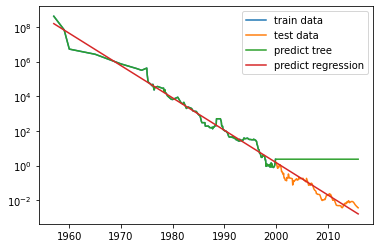

In [26]:
plt.semilogy(data_train.date,data_train.price, label='train data')
plt.semilogy(data_test.date,data_test.price, label='test data')

#예측치 출력
plt.semilogy(ram_price.date,price_tree, label='predict tree')
plt.semilogy(ram_price.date,price_lr, label='predict regression')
plt.legend()

#그래프해석 테스트 범위를 2000년>=로 잡았기 때문에 위와같음
#트리알고리즘= 학습데이터를 따라 점을 찍어 나가다가 2000년에서 학습데이터가 끊겨서 중단된 형태
##따라저 트리알고리즘=주어진 데이터 안에서만 예측가능
#리니어리그리션=선형회기=빨간선 학습데이터 이후에도 예측이 가능함.

#---------------------------------트리알고리즘의 한계치에 대한 케이스스터디

트리알고리즘이 모여 만들어진 알고리즘
## RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn. datasets import make_moons

X, y= make_moons(n_samples=100, noise=0.25, random_state=3)

In [28]:
#학습, 테스트 영역 지정하고 쪼개기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
forest=RandomForestClassifier(n_estimators=5, random_state=2) #n_estimators=트리알고리즘 개수
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

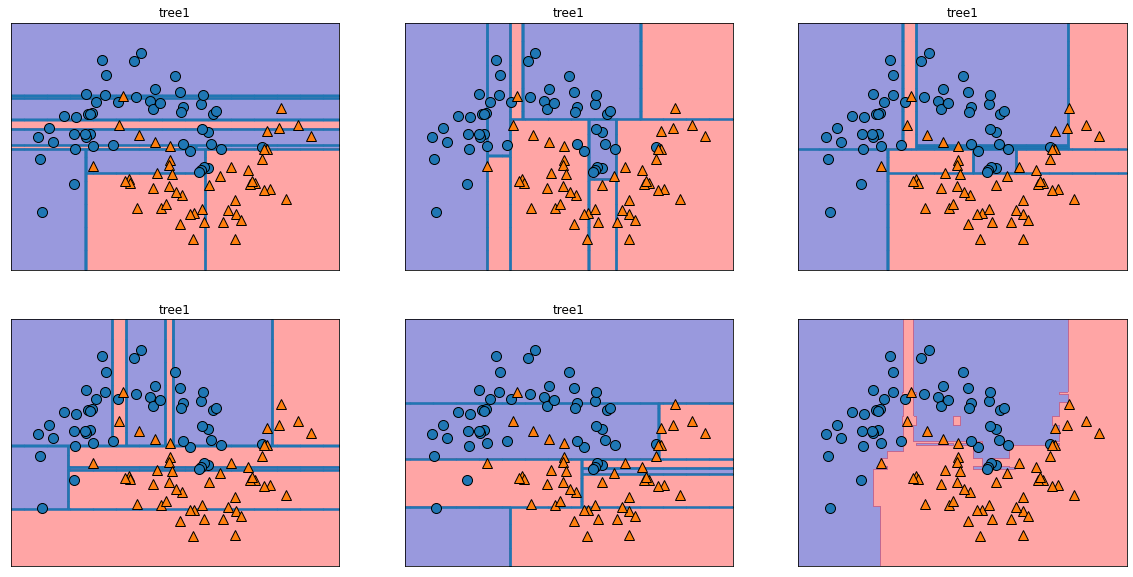

In [30]:
fig,axes=plt.subplots(2,3, figsize=(20,10)) #axes앞에 쉼표 탈자

for i,(ax, tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('tree{}'.format(1))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax) #ax=ax=축지정
#   .estimators_)=n_estimators자리
#아래그래프마다 넘버링하는 명령값enumerate=열거형
#.format(1)는 {}에 들어감
#partition=각각의 요소가 어떻게 나눠져있는지 차트에 보여주는 메소드

#마지막칸=트리알고리즘 5개의 최종 집약데이터 자리
mglearn.plots.plot_2d_separator(forest,X,fill=True, ax=axes[-1,-1],
                               alpha=0.4)

#ax=axes[-1,-1]=마지막 빈칸의 코드표현
#fill=True, 채우고   겹쳐서 안보이니까 alpha=0.4= 불투명도부여
#6번째킨=최종 집약데이터 자리 그래프생성
mglearn.discrete_scatter(X[:,0],X[:,1],y)

#QnA <p>
#eps=특정수보다 낮은수데이터는 무시하도록 명령 <p>
#why?일정숫자이하의 데이터가 들어올경우 0을 나누면 컴퓨터가 에러남. 에러방지차원<p>

In [32]:
#위의 데이터를 쪼개는 작업(세분화작업) 현제데이터=make_moons
X_train, X_test, y_train, y_test=train_test_split(
    cancer.data, cancer.target, random_state=0) #cancer데이터불러냄
forest =RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

1.0
0.972027972027972


In [34]:
plot_feature_importances_cancer(forest)
#메서드 미설치로 실행안됌

NameError: name 'plot_feature_importances_cancer' is not defined

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test=train_test_split(
    cancer.data, cancer.target, random_state=0)

In [36]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [37]:
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

1.0
0.965034965034965


In [38]:
#결과분석 forest(97%)보다 gbrt(96%)의 테스트값이 뒤쳐짐
#gbrt에 제약을 걸어 새로 출력
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

0.9906103286384976
0.972027972027972


뎁스를 적용하고 학습값 하락 테스트값 향상 <p>
gbrt를 실무에서 사용시에는 3~5단계정도로 설정하고 출력하는게 통상적임.<p>
but학습용데이터와 테스트데이터가 과접합하면 신뢰도가 떨어지는 결과값이므로<p>
두 데이터의 일치도가 높은경우 5에서 조정이 들어가야함<p>
 gbrt장점=적은 데이터로 높은정확도를 도출

In [40]:
#학습정도에 제약걸기
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

0.9882629107981221
0.965034965034965


학습정확도, 테스트정확도 둘다 저하<p>
러닝레이트지정시 학습정도를 지정할 수 있음= 학습의 복잡도 제어가능<p>
learning_rate=1 설정시
[gbrt = GradientBoostingClassifier(random_state=0)]의 조건과  동일값나옴<p>
gbrt의 장점=러닝레이트, 뎁스 둘다 제어가능.
    뎁스를 낮게줬는데 정확도가 올라감.(보정하는 알고리즘이 포함되어있기때문)= 적은메모리 사용, 속도빠름<p>
    
**따라서 입수되는 데이터에 따라 걸맞는 학습/테스트 알고리즘과 제약을 적절히 선택해야함**

In [41]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4,random_state=8)
#설정한 옵션을 x,y에 저장

X

array([[ -1.72161036,  -1.48033142],
       [ -3.6573384 ,  -9.5482383 ],
       [  7.0778163 ,   0.99508772],
       [ -1.36579859,  -0.3148625 ],
       [ -2.66521206,  -3.12591651],
       [  7.63027116,   8.69797933],
       [ -5.27144331, -12.11880698],
       [  7.91767139,   1.41547387],
       [ -1.41284184,   0.11296348],
       [ -1.01519039,  -1.03318203],
       [  8.2634157 ,  10.34723435],
       [  6.96767867,   8.9622523 ],
       [ -0.84779249,  -2.12185612],
       [  7.48006237,   2.49392925],
       [  7.71454967,   1.8420701 ],
       [ -7.74064658,  -8.61800744],
       [ -5.41087235,  -8.7194128 ],
       [ -2.27579204,  -2.89699926],
       [ -1.25668449,  -2.33416219],
       [  7.61227907,   9.4463627 ],
       [  8.81545663,   8.76386046],
       [  7.1895354 ,   0.43090048],
       [  7.40292703,   9.16217702],
       [  5.17209648,  11.78064756],
       [ -2.10476115,  -1.57846672],
       [  6.5342397 ,   9.45532341],
       [  7.59635095,   8.0197955 ],
 

In [42]:
y #총 4개의 집합나오는 데이터 생성됨을 확인

array([3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1,
       0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1,
       3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 1])

Text(0, 0.5, 'feature 1')

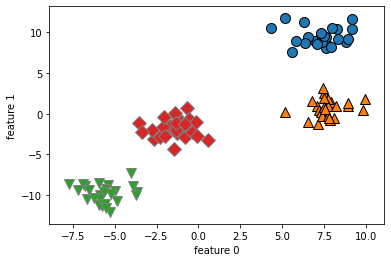

In [43]:
X, y = make_blobs(centers=4,random_state=8)
mglearn.discrete_scatter(X[:,0], X[:,1], y) #. _오타
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

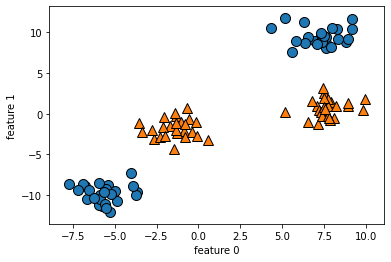

In [44]:
# 라벨값을 모르는 4개집단 생성. 2개집단으로 그루핑하고자 함. 0-2(짝), 1-3(홀)으로 묶으려 한다.
X, y = make_blobs(centers=4,random_state=8)
y = y % 2
#0123이 들어가있는 y에 홀짝을 구분하기 위해서는 2로 나눴을때 나머지가 0인수를 찾으면 됌
#하지만 실제 나눗셈에서는 나머지가 발생하므로  나눈 나머지값은 버리는 %를 사용

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

2그룹으로 나뉨. but선형회귀로는 분류불가
위 사례의 분류방법 =
**SVC**